#### RMSPROP  (adaptive learning)
instead of using the same learning rate for all connections of the NN we can have an adaptive learning rate for every connection calculated based on the previous gradients of this weight and current gradient.
RMSprop automates learning-rate tuning for us  
-- review **RMSPROP** and **ADAM**

- [train_data](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip)
- [validation_data](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip)

In [104]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [53]:
%matplotlib inline

In [54]:
# unzip the data.
# zip_path = "data/horse-or-human.zip"
# data_path = "data/horse_or_human"
# zip_ref = zipfile.ZipFile(zip_path, 'r')
# zip_ref.extractall(data_path)
# zip_ref.close()

In [171]:
# explore the data.
train_dir_path = "data/horses_humans/training/"
test_dir_path = "data/horses_humans/testing/"

train_horse_names = os.listdir(os.path.join(train_dir_path, "horses"))
train_human_names = os.listdir(os.path.join(train_dir_path, "humans"))

test_horse_names = os.listdir(os.path.join(test_dir_path, "horses"))
test_human_names = os.listdir(os.path.join(test_dir_path, "humans"))

print("\t\t\tTraining Data")
print(f"Train Humans: {len(train_human_names)}")
print(f"Train Horses: {len(train_horse_names)}")

print(f"human names: {train_human_names[:3]}")
print(f"horse names: {train_horse_names[:3]}")

horse_img = mpimg.imread(os.path.join(train_dir_path, "horses", train_horse_names[0]))
human_img = mpimg.imread(os.path.join(train_dir_path, "humans", train_human_names[0]))
print(f"Human Image Shape: {human_img.shape}")
print(f"Horse Image Shape: {horse_img.shape}")

print("\t\t\tTest Data")
print(f"Test Humans: {len(test_human_names)}")
print(f"Test Horses: {len(test_horse_names)}")

print(f"human names: {test_human_names[:3]}")
print(f"horse names: {test_horse_names[:3]}")

horse_img = mpimg.imread(os.path.join(test_dir_path, "horses", test_horse_names[0]))
human_img = mpimg.imread(os.path.join(test_dir_path, "humans", test_human_names[0]))
print(f"Human Image Shape: {human_img.shape}")
print(f"Horse Image Shape: {horse_img.shape}")


			Training Data
Train Humans: 527
Train Horses: 500
human names: ['human01-00.png', 'human01-01.png', 'human01-02.png']
horse names: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png']
Human Image Shape: (300, 300, 4)
Horse Image Shape: (300, 300, 4)
			Test Data
Test Humans: 128
Test Horses: 128
human names: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png']
horse names: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png']
Human Image Shape: (300, 300, 4)
Horse Image Shape: (300, 300, 4)


In [172]:
# visualize some samples (8 horses images and 8 humans images).
nrows = 1
ncols = 4
pic_index = 0

In [178]:
# set the figure size where every image will occupies 4*4 inches.
def show_imgs(train_dir_path, horses_names, humans_names, data_class="Train",
              fid=1, nrows=1, ncols=4):
    
    global pic_index
    plt.figure(fid)
    fig = plt.gcf()
    fig.set_size_inches(ncols*2, nrows*2)

    # get the (ncols*nrows)/2 horses names and (ncols*nrows)/2 human names.
    type_n = int((ncols*nrows)/2)
    horses = [os.path.join(train_dir_path, "horses", ho) 
              for ho in horses_names[pic_index - type_n:pic_index]
             ]

    humans = [os.path.join(train_dir_path, "humans", hu)
              for hu in humans_names[pic_index-type_n:pic_index]
             ]

    for img_i, img_path in enumerate(horses+humans):
        sp = plt.subplot(nrows, ncols, img_i + 1)
        sp.set_title(data_class)
        sp.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.show()
    
show_imgs(train_dir_path, train_horse_names, train_human_names)
show_imgs(test_dir_path, test_horse_names, test_human_names, "Testing", 2)


<Figure size 576x144 with 0 Axes>

<Figure size 576x144 with 0 Axes>

####                                                               THE MODEL

In [174]:
h, w, c = horse_img.shape
# target accuracy
# class Accuracy(keras.callbacks)

# define the model
model = keras.models.Sequential([
            keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(h, w, c-1),
            keras.layers.MaxPool2D(2, 2),
            keras.layers.Conv2D(32, (3, 3), activation="relu"), 
            keras.layers.MaxPool2D(2, 2),
            keras.layers.Conv2D(64, (3, 3), activation="relu"), 
            keras.layers.MaxPool2D(2, 2),
            keras.layers.Conv2D(64, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(64, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Flatten(),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
    
        ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 64)       

In [179]:
# compile the model.
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [180]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train generator
train_datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir_path,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# validation generator
validation_datagen = ImageDataGenerator(rescale=1/255.0)
validation_generator = validation_datagen.flow_from_directory(
       test_dir_path, 
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [181]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8
) 

Epoch 1/15
8/8 [==============================] - 47s 6s/step - loss: 1.3508 - accuracy: 0.5172 - val_loss: 0.5973 - val_accuracy: 0.6641
Epoch 2/15
8/8 [==============================] - 49s 6s/step - loss: 0.5001 - accuracy: 0.7898 - val_loss: 0.3187 - val_accuracy: 0.8711
Epoch 3/15
8/8 [==============================] - 47s 6s/step - loss: 0.5192 - accuracy: 0.8287 - val_loss: 0.5460 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 56s 7s/step - loss: 0.2261 - accuracy: 0.9268 - val_loss: 2.0025 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 52s 6s/step - loss: 0.1591 - accuracy: 0.9455 - val_loss: 1.3728 - val_accuracy: 0.8320
Epoch 6/15
8/8 [==============================] - 40s 5s/step - loss: 0.0819 - accuracy: 0.9700 - val_loss: 1.2672 - val_accuracy: 0.8477
Epoch 7/15
8/8 [==============================] - 39s 5s/step - loss: 0.3827 - accuracy: 0.8843 - val_loss: 1.9192 - val_accuracy: 0.8008
Epoch 8/15
8/8 [==================

In [182]:
# read image.
from tensorflow.keras.preprocessing import image
def read_image(path):
    img = image.load_img(img_path, target_size=(300, 300))
    im = image.img_to_array(img)
    im = im.reshape((1,) + im.shape)
    return im/255.0

In [190]:
img_path = test_dir_path + "humans/valbeautiful_girl.jpeg"
beautiful_girl = read_image(img_path);
classes = model.predict(beautiful_girl)
print(classes)
print("human") if classes[0]>0.5 else print("horse")

[[6.8401054e-09]]
horse


<ipython-input-191-507b76ff20fe>:27: RuntimeWarning: invalid value encountered in true_divide
  feature = (feature - feature.mean()) / feature.std()


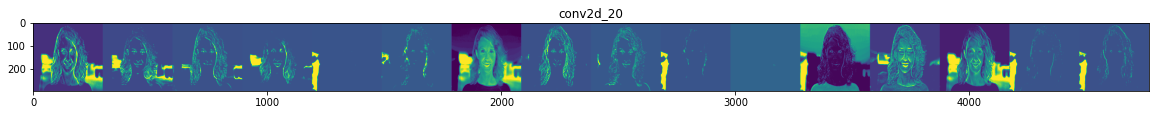

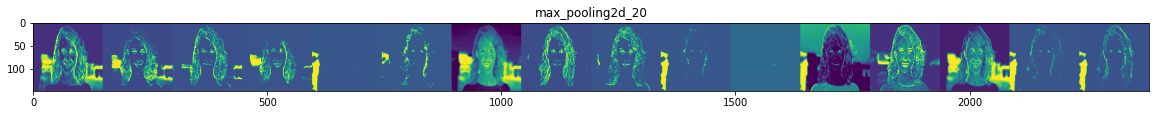

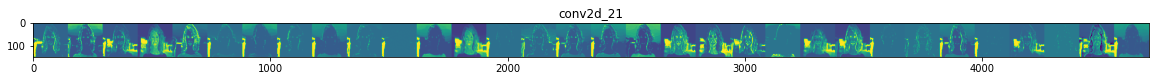

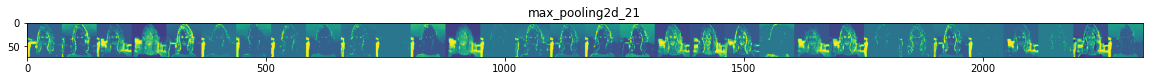

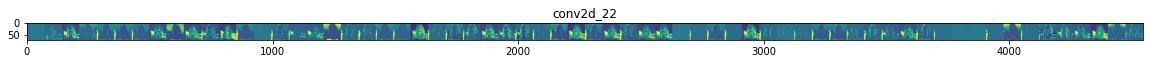

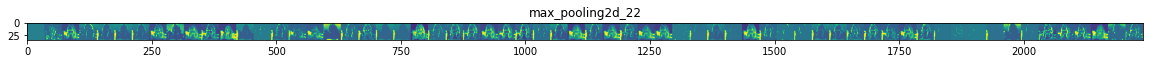

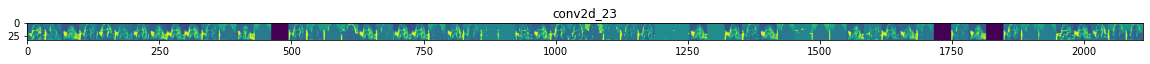

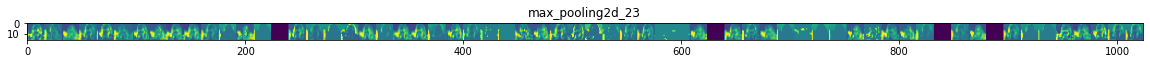

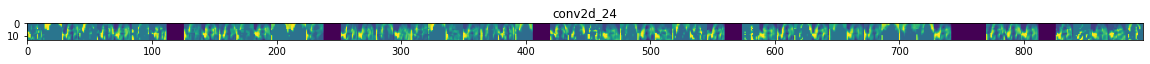

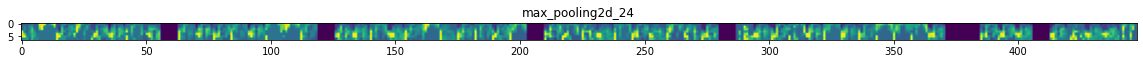

In [191]:
####  Visualize what the CONV LAYERS Learned features.
import random

# define a new model that takes the image as input and ouptut the intermediate hidden output
# for every leyer.

successive_outputs = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

visualization_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)

# let's feed the model with the input image.
# img_path = train_human_dir + "/" + random.choice(train_human_names)
successive_feature_maps = visualization_model.predict(beautiful_girl)

# display the transformed representation of the input image.
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4: # we care only about the conv layers in the DNN.
        n_features = feature_map.shape[-1]  # number of features in feature map
        size = feature_map.shape[1]
        
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            feature = feature_map[0, :, :, i]
            feature = (feature - feature.mean()) / feature.std()
            feature = feature * 64 + 128
            feature = np.clip(feature, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = feature
            
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

In [192]:
# save the model
model_path = "horses_humans_classifier_model"

# save as tensorflow savedModel format (.pb, variables, assests)
model.save(model_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: horses_humans_classifier_model/assets
